In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [26]:
df = pd.read_csv(r"E:\PGDA 41\Machine Learning\Assignment\11-05-2025\Cereal\cereal_data.csv")
df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,Corn Flakes,K,C,100,2,0,200,1.0,21.0,2,30,25,1,1.0,1.00,45.0
1,Honey Nut Cheerios,G,C,110,3,1,180,1.5,22.0,12,90,25,1,1.0,0.75,31.0
2,Rice Krispies,K,C,110,2,0,290,0.0,23.0,3,35,25,1,1.0,1.00,40.0
3,Special K,K,C,110,6,0,230,1.0,14.0,5,55,25,1,1.0,1.00,54.0
4,Frosted Flakes,K,C,110,1,0,200,1.0,14.0,11,25,25,1,1.0,0.75,31.0


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      5 non-null      object 
 1   mfr       5 non-null      object 
 2   type      5 non-null      object 
 3   calories  5 non-null      int64  
 4   protein   5 non-null      int64  
 5   fat       5 non-null      int64  
 6   sodium    5 non-null      int64  
 7   fiber     5 non-null      float64
 8   carbo     5 non-null      float64
 9   sugars    5 non-null      int64  
 10  potass    5 non-null      int64  
 11  vitamins  5 non-null      int64  
 12  shelf     5 non-null      int64  
 13  weight    5 non-null      float64
 14  cups      5 non-null      float64
 15  rating    5 non-null      float64
dtypes: float64(5), int64(8), object(3)
memory usage: 772.0+ bytes


In [30]:
df.columns = [col.lower().replace(' ', '_') for col in df.columns]
df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,Corn Flakes,K,C,100,2,0,200,1.0,21.0,2,30,25,1,1.0,1.00,45.0
1,Honey Nut Cheerios,G,C,110,3,1,180,1.5,22.0,12,90,25,1,1.0,0.75,31.0
2,Rice Krispies,K,C,110,2,0,290,0.0,23.0,3,35,25,1,1.0,1.00,40.0
3,Special K,K,C,110,6,0,230,1.0,14.0,5,55,25,1,1.0,1.00,54.0
4,Frosted Flakes,K,C,110,1,0,200,1.0,14.0,11,25,25,1,1.0,0.75,31.0


In [32]:
def health_tag(row):
    if row['sugars'] <= 5 and row['fiber'] >= 1.5:
        return 'Healthy'
    elif row['sugars'] <= 7:
        return 'Moderate'
    else:
        return 'Unhealthy'

df['health_tag'] = df.apply(health_tag, axis=1)
df[['name', 'sugars', 'fiber', 'health_tag']]

,name,sugars,fiber,health_tag
0,Corn Flakes,2,1.0,Moderate
1,Honey Nut Cheerios,12,1.5,Unhealthy
2,Rice Krispies,3,0.0,Moderate
3,Special K,5,1.0,Moderate
4,Frosted Flakes,11,1.0,Unhealthy


<Figure size 1000x600 with 0 Axes>

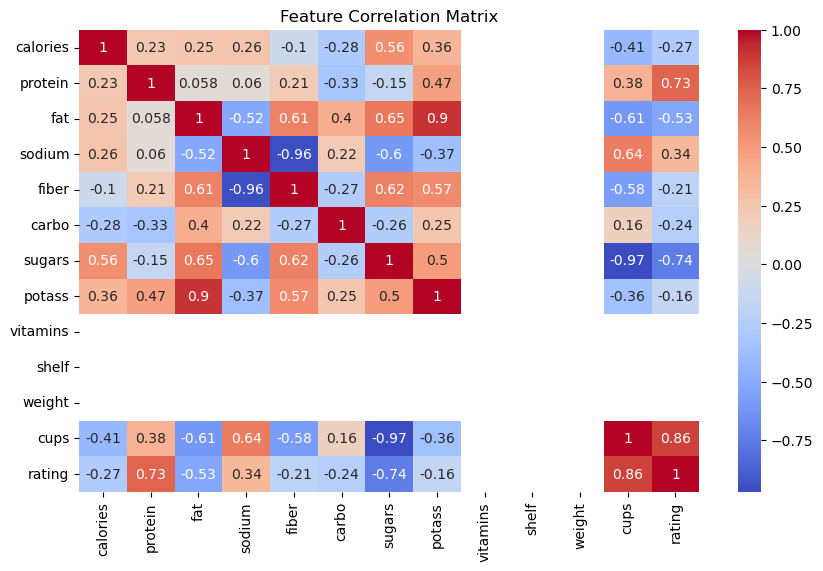

In [36]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()